In [1]:
#importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA,KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_mldata,make_circles
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder 

In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [19]:
#https://datos.gob.mx/busca/dataset/pacientes-en-espera-de-un-organo-o-tejido-al-31-de-diciembre-de-2019
path = 'C:\\Users\\hades\\Downloads\\dataset práctica 1\\Pacientes_en_espera.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
data=df.copy()
data.head()

,CODIGO_SEXO,GRUPO_SANGUINEO,RH,ORIGEN_INJERTO,ESTABLECIMIENTO,INSTITUCION,CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE,ORGANO
0,2,O,POSITIVO,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,14,99,99,RIÑÓN
1,1,O,POSITIVO,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,14,99,99,RIÑÓN
2,2,O,NEGATIVO,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,14,99,99,RIÑÓN
3,2,O,POSITIVO,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,14,99,99,RIÑÓN
4,2,O,NEGATIVO,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,14,99,99,RIÑÓN


In [3]:
le = LabelEncoder() 
data['RH']= le.fit_transform(data['RH'])
#daf['ORGANO']= le.fit_transform(daf['ORGANO'])
data['ESTABLECIMIENTO']= le.fit_transform(data['ESTABLECIMIENTO'])
data['INSTITUCION']= le.fit_transform(data['INSTITUCION'])
data['GRUPO_SANGUINEO']= le.fit_transform(data['GRUPO_SANGUINEO'])
data['ORIGEN_INJERTO']= le.fit_transform(data['ORIGEN_INJERTO'])
data.head()

,CODIGO_SEXO,GRUPO_SANGUINEO,RH,ORIGEN_INJERTO,ESTABLECIMIENTO,INSTITUCION,CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE,ORGANO
0,2,9,4,0,266,0,14,99,99,RIÑÓN
1,1,9,4,0,266,0,14,99,99,RIÑÓN
2,2,9,1,0,266,0,14,99,99,RIÑÓN
3,2,9,4,0,266,0,14,99,99,RIÑÓN
4,2,9,1,0,266,0,14,99,99,RIÑÓN


In [5]:
col=data.columns#toma las  columnas
features=col.tolist() 
feature=features[:-1] 
target=features[-1]#quita Resultados
X=data.loc[:,feature].values  
y=data.loc[:,target].values
#estandarizado
sc=StandardScaler()  
X=sc.fit_transform(X) 
pd.DataFrame(X,columns=feature).head()


,CODIGO_SEXO,GRUPO_SANGUINEO,RH,ORIGEN_INJERTO,ESTABLECIMIENTO,INSTITUCION,CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE
0,1.180684,0.618776,0.442866,-0.17673,0.801883,-0.577772,0.107776,5.331905,5.757903
1,-0.846967,0.618776,0.442866,-0.17673,0.801883,-0.577772,0.107776,5.331905,5.757903
2,1.180684,0.618776,-2.610022,-0.17673,0.801883,-0.577772,0.107776,5.331905,5.757903
3,1.180684,0.618776,0.442866,-0.17673,0.801883,-0.577772,0.107776,5.331905,5.757903
4,1.180684,0.618776,-2.610022,-0.17673,0.801883,-0.577772,0.107776,5.331905,5.757903


In [6]:
#Definiendo componentes 
pca=PCA(n_components=2) 
principalComponents=pca.fit_transform(X) 
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2']) 
principalDf.head()

,principal component 1,principal component 2
0,6.871178,3.218974
1,6.873492,3.028562
2,6.584485,4.341075
3,6.871178,3.218974
4,6.584485,4.341075


In [7]:
finalDf=pd.concat([principalDf,data[['ORGANO']]],axis=1)
finalDf.head()

,principal component 1,principal component 2,ORGANO
0,6.871178,3.218974,RIÑÓN
1,6.873492,3.028562,RIÑÓN
2,6.584485,4.341075,RIÑÓN
3,6.871178,3.218974,RIÑÓN
4,6.584485,4.341075,RIÑÓN


In [8]:
data.ORGANO.unique()

array(['RIÑÓN', 'CÓRNEA', 'HÍGADO', 'C.P.H.', 'CORAZÓN', 'PARATIROIDES',
       'RIÑÓN-RIÑÓN', 'MANO', 'EXTREMIDADES', 'BANCO CORNEAS',
       'RIÑÓN-PÁNCREAS', 'PÁNCREAS', 'HÍGADO-RIÑÓN', 'CORAZÓN-PULMÓN',
       'PIEL', 'CARA', 'PULMÓN'], dtype=object)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)
print('X_train shape',X_train.shape)  
print('X_test shape',X_test.shape)   
print('y_train shape',y_train.shape)  
print('y_test shape',y_test.shape)

X_train shape (18621, 9)
X_test shape (4656, 9)
y_train shape (18621,)
y_test shape (4656,)


In [10]:
X_train_original=X_train.copy()

In [11]:

#fit only on Training data  
sc.fit(X_train)   
#Apply the transformation to both test & train data   
X_train=sc.fit_transform(X_train)   
X_test=sc.fit_transform(X_test)

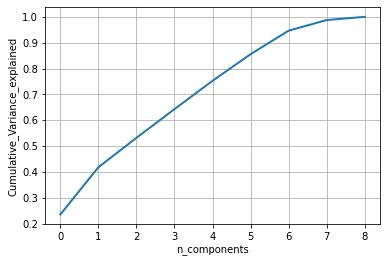

In [12]:
pca=PCA()  
pca.n_components=9
pca_data=pca.fit_transform(X_train)
percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)
#plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()

In [13]:
pca=PCA()  
pca.n_components=9
pca_data=pca.fit_transform(X_train)  
# look at explainded variance of PCA components 
exp_var_cumsum=pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)  
for index,var in enumerate(exp_var_cumsum):  
    print('if n_components= %d,   variance=%f' %(index,np.round(var,3)))

if n_components= 0,   variance=23.530000
if n_components= 1,   variance=41.810000
if n_components= 2,   variance=53.190000
if n_components= 3,   variance=64.300000
if n_components= 4,   variance=75.240000
if n_components= 5,   variance=85.550000
if n_components= 6,   variance=94.650000
if n_components= 7,   variance=98.760000
if n_components= 8,   variance=100.000000


In [14]:
pca=PCA(.90)  
pca.fit(X_train)  
print('Number of components to explain 90% Variance is',pca.n_components_)

Number of components to explain 90% Variance is 7


In [15]:
pca=PCA(n_components=2) 
pca_data_vis=pca.fit_transform(X_train) 
print('shape of PCA data',pca_data_vis.shape)

shape of PCA data (18621, 2)


C:\Users\hades\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


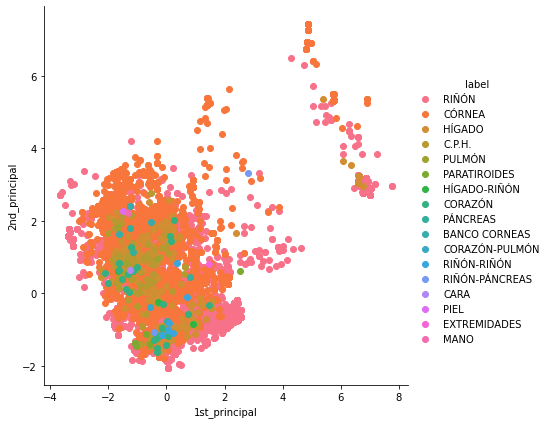

In [16]:
pca_data_vis = np.vstack((pca_data_vis.T,y_train)).T
pca_vis_df = pd.DataFrame(data=pca_data_vis,columns=("1st_principal","2nd_principal","label"))  
sns.FacetGrid(pca_vis_df,hue="label",size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

In [17]:
pca=PCA(.90) 
pca.fit(X_train) 
X_train=pca.transform(X_train) 
X_test=pca.transform(X_test)
from sklearn.linear_model  import LogisticRegression  
LogReg=LogisticRegression(class_weight='balanced')  
LogReg.fit(X_train,y_train)
y_pred=LogReg.predict(X_test)

C:\Users\hades\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hades\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [18]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score
print('Accuracy:',accuracy_score(y_test,y_pred))  
print('F1 score:',f1_score(y_test,y_pred,average='weighted'))   
print('Recall:',recall_score(y_test,y_pred,average='weighted'))   
print('Precision:',precision_score(y_test,y_pred,average='weighted'))  
print('\n clasification report:\n',classification_report(y_test,y_pred))  
print('\n confussion matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy: 0.7502147766323024
F1 score: 0.8126629838538545
Recall: 0.7502147766323024
Precision: 0.896086798516789


C:\Users\hades\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\hades\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\hades\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 clasification report:
                 precision    recall  f1-score   support

 BANCO CORNEAS       0.00      0.00      0.00         0
        C.P.H.       0.25      0.82      0.38        17
          CARA       0.00      0.00      0.00         0
       CORAZÓN       0.00      0.00      0.00        13
CORAZÓN-PULMÓN       0.00      0.00      0.00         0
        CÓRNEA       0.87      0.57      0.69      1128
  EXTREMIDADES       0.00      0.00      0.00         0
        HÍGADO       0.14      0.12      0.13        52
  HÍGADO-RIÑÓN       0.00      0.00      0.00         0
  PARATIROIDES       0.31      1.00      0.47         4
          PIEL       0.00      0.00      0.00         0
        PULMÓN       0.00      0.00      0.00         0
      PÁNCREAS       0.00      0.00      0.00         1
         RIÑÓN       0.92      0.82      0.87      3441
RIÑÓN-PÁNCREAS       0.00      0.00      0.00         0

      accuracy                           0.75      4656
     macro avg       